**About Data Set**

Input variables:

1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
Output variable:

12. quality (score between 0 and 10)





In [1]:
import numpy as np
import pandas as pd
import warnings #ignore warnings
import pickle
warnings.filterwarnings('ignore')

In [2]:
red_wine_data = pd.read_csv('https://raw.githubusercontent.com/btkhimsar/DataSets/master/winequality-red.csv',sep=";")

white_wine_data = https://raw.githubusercontent.com/btkhimsar/DataSets/master/winequality-white.csv

**1. Head**


To take a closer look at the data, we take the help of “ .head()” function of pandas library which returns the first five observations of the data set. Similarly, “.tail()” returns last five observations of the data set.

You’ll see that this is a great way to get an initial feeling of your data and maybe understand it a bit better already!

In [3]:
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**2. Shape**
Find out the total number of rows and columns in the dataset using “.shape”.



In [4]:
red_wine_data.shape

(1599, 12)

**Observations:**
* Dataset comprises 1599 observations(rows) and 12 features(columns).
* Out of the 12, one is the target variable and rest 11 are input variables.





**3.  Get a Statistical Overview using Describe**


The describe() function in pandas is very handy in getting various summary statistics. This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [5]:
red_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Let's explore different statistical measures that we have got from describe().

* **count**: total count of non-null values in the column
* **mean**: the average of all the values in that column
* **min**: the minimum value in the column
* **max**: the maximum value in the column
* **25%**: first quartile in the column after we arrange those values in ascending order
* **50%**: this is the median or the second quartile
* **75%**: the third quartile
* **std**: this is the standard deviation (i.e. measure of depreciation, you must have read in the basics of statistics study material)
Note: 25%, 50%, and 75% are nothing but corresponding percentile values

**Observations:**

* Here as you can notice the mean value is less than the median value of each column. Median is represented by 50%(50th percentile) in the index column.This signifies the presence of Outliers. For example, a data set includes values: 30, 31, 32, and 2. The mean value (23.75), which is lower than the median of the data (30.5), is greatly affected by the extreme data point(2). 
* There is notably a large difference between 75th %tile and max values of predictors “residual sugar”, ” free sulfur dioxide”, ” total sulfur dioxide”. This indicates that some values of these 3 variables lie much farther from the general range of values( up to 75th %tile) 
* Thus, the observations 1 and 2 suggest that there are extreme values i.e Outliers in our dataset. 

**Exploring the Features/Variables**

Variables and features both are the same, they are often used interchangeably. All the column names in a dataset are variables.

Let's explore the features/columns of the datasets.

In [6]:
red_wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

**Target Variable:**

The target variable of a dataset is the feature of a dataset about which you want to gain a deeper understanding. It is the variable that is, or should be the output.

Here **quality** is the target variable as we're trying to know which of the two types of wines have better quality.

**Input Variables:**

One or more variables that are used to determine (or predict) the 'Target Variable' are known as Input Variables. They are sometimes called Predictor Variable as well.

In our example, the input variables are: 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', and 'alcohol'.

All of these will help us predict the quality of the wine.

After loading the data, it is important to examine the data. It is usually not recommended to directly throw all the data into the model without understanding the data. This step always helps in improving our model.

**1. Unique Values of Quality(Target Variable)**

In [7]:
red_wine_data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [8]:
red_wine_data['quality'].nunique()

6

**Observations:**

Few key insights just by looking at the target variable are as follows:
* Target variable/Dependent variable is discrete and categorical in nature.
* “quality” score scale ranges from 1 to 10; 1 being poor and 10 being the best.
* 1,2,9 & 10 Quality ratings are not given by any observation. Only scores obtained are between 3 to 8.
 

**2. Frequency Counts of each Quality Value**

value_counts function count the occurrenes of each value in the column.

In [9]:
red_wine_data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

**Observations:**

* This tells us the vote count of each quality score in descending order.
* “quality” has most values concentrated in the categories 5, 6 and 7.
* Only a few observations made for the categories 3 & 8.

**3. Renaming Columns**

* rename() is used to rename the columns
* parameters .rename(columns = {'old_name':'new_name'},inplace= True)
* inplace =True makes change in the dataframe itself.

In [10]:
red_wine_data.rename(columns= {'fixed acidity':'fixed_acidity', 'volatile acidity':'volatile_acidity', 'citric acid':'citric_acid', 'residual sugar':'residual_sugar',
      'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide',})

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


**Checking for Missing Values**

Handling missing values is an essential part of the data cleaning and preparation process because almost all data in real life comes with some missing values.

Pandas provides isnull(), isna() functions to detect missing values. Both of them do the same thing.

* df.isna() returns the dataframe with boolean values indicating missing values.
* You can also choose to use notna() which is just the opposite of isna().
* df.isna().any() returns a boolean value for each column. If there is at least one missing value in that column, the result is True.
* df.isna().sum() returns the number of missing values in each column.
 

**1. isna()**

In [11]:
red_wine_data.isna()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
red_wine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Observation:**
There is no missing value in any column

**2. info()**

df.info returns information about the data frame including the data types of each column, number of null values in each column and memory usage of the entire data.

In [13]:
red_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Observations:**

* The data has only float and integer values.
* There are no missing values

**Checking for Duplicates**

Duplicates might or might not affect the quality of data. Before deciding if they should be removed, it is essential to understand why they might have occurred in the first place.

Duplicates can be checked using the duplicated() method.

In [14]:
duplicate = red_wine_data[red_wine_data.duplicated()]
duplicate.shape



(240, 12)

**Observations:**

There are 240 duplicates. The quality ratings for the same/similar wine were given by different wine tasters so there is a possibility of similar reviews. We can thus keep these duplicates.

**Data Visualization Or Graphical Representation**

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

**Separating Input and Target Variables**

In [16]:
y = red_wine_data['quality']
X = red_wine_data.drop(red_wine_data['quality'],inplace= True)


* X now contains all the features except Quality.
* y contains Quality.

**Histogram**

Histograms use bars to visualize data as well. Many people may not even realize there is a difference between a histogram and a bar chart. They practically look the same from a distance.

Let's plot a histogram now! On calling the hist( ) method on a DataFrame, you'll get histograms for all the Series.



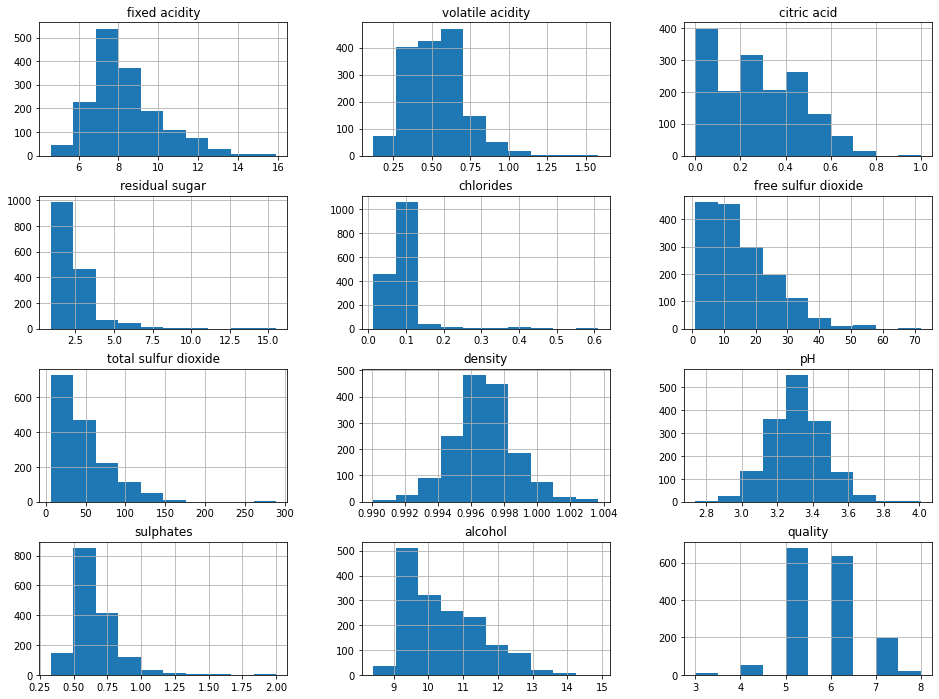

In [17]:
red_wine_data.hist(bins=10,figsize=(16,12))
plt.show()

**Observations:**

* The distribution of the attribute “alcohol” seems to be positively skewed i.e the curve is shifted towards the left.
* The attributes 'density' and 'pH' are quite normally distributed.
* Now looking at the attribute quality, we can observe that the wines with average quality (i.e. quality rating 5 to 7) are more than wines with bad(1-4) or good(8-10) quality.

**Correlation Matrix with Heatmap**

**Correlation:**

Correlation is a statistical measure. Data correlation is a way to understand the relationship between multiple values or features in your dataset.

Every single successful data science project revolves around finding accurate correlations between the input and target variables. However more than often, we oversee how crucial correlation analysis is. 

It is recommended to perform correlation analysis before and after data gathering and transformation phases of a data science project.

 There are three different types of correlations:

1. **Positive Correlation**: Two features (variables) can be positively correlated with each other. It means that when the value of one variable increases then the value of the other variable(s) also increases (also decreases when the other decreases).
Eg. The more time you spend running on a treadmill, the more calories you will burn.
2. **Negative Correlation**: Two features (variables) can be negatively correlated with each other. This occurs when the value of one variable increases and the value of another variable(s) decreases (inversely proportional).
Eg. As the weather gets colder, air conditioning costs decrease.
3. **No Correlation**: Two features might not have any relationship with each other. This happens when the value of a variable is changed then the value of the other variable is not impacted.
Eg. There is no relationship between the amount of tea drunk and level of intelligence.
Each of these correlation types exists in a spectrum represented by values from -1 to +1 where slight or high positive correlation features can be like 0.5 or 0.7.
A very strong and perfect positive correlation is represented by a correlation score of 0.9 or 1.
If there is a strong negative correlation, it will be represented by a value of -0.9 or -1. Values close to zero indicates no correlation.


We can check how each feature is related to others using corr() function.

In [18]:
red_wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.254398,0.671410,0.114616,0.093650,-0.154536,-0.114387,0.668582,-0.682678,0.182851,-0.062303,0.124330
volatile acidity,-0.254398,1.000000,-0.551206,0.002691,0.061790,-0.009841,0.077683,0.022580,0.233098,-0.260545,-0.201714,-0.391616
citric acid,0.671410,-0.551206,1.000000,0.142135,0.203428,-0.062613,0.033668,0.365729,-0.540720,0.311429,0.107572,0.228214
residual sugar,0.114616,0.002691,0.142135,1.000000,0.054904,0.186785,0.202718,0.355577,-0.084971,0.003772,0.040552,0.014504
chlorides,0.093650,0.061790,0.203428,0.054904,1.000000,0.005293,0.047110,0.200734,-0.265023,0.370793,-0.222395,-0.128786
free sulfur dioxide,-0.154536,-0.009841,-0.062613,0.186785,0.005293,1.000000,0.667660,-0.021810,0.071316,0.051157,-0.070349,-0.050443
total sulfur dioxide,-0.114387,0.077683,0.033668,0.202718,0.047110,0.667660,1.000000,0.070902,-0.065474,0.042388,-0.206664,-0.184133
density,0.668582,0.022580,0.365729,0.355577,0.200734,-0.021810,0.070902,1.000000,-0.342598,0.148474,-0.496641,-0.174029
pH,-0.682678,0.233098,-0.540720,-0.084971,-0.265023,0.071316,-0.065474,-0.342598,1.000000,-0.196103,0.207645,-0.057320
sulphates,0.182851,-0.260545,0.311429,0.003772,0.370793,0.051157,0.042388,0.148474,-0.196103,1.000000,0.091686,0.253019


Creating a pictorial visualisation of the above correlation matrix using a heatmap helps in better understanding. We can do that using Seaborn's Heatmap function.

<AxesSubplot:>

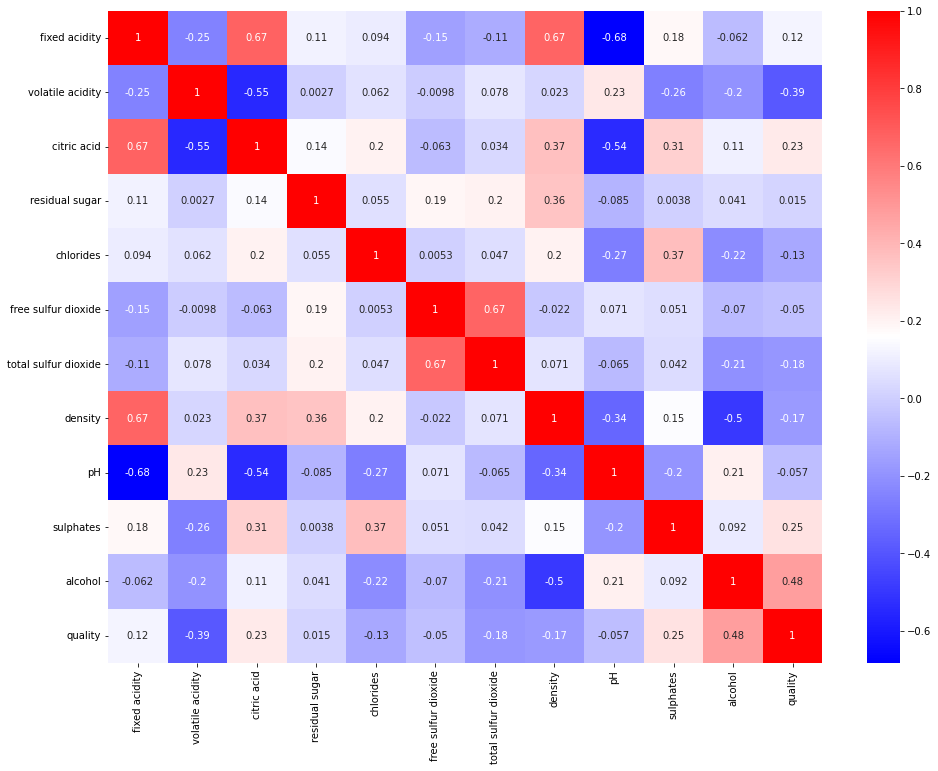

In [19]:
plt.figure(figsize=(16,12))
sns.heatmap(red_wine_data.corr(),cmap='bwr',annot=True)

**Observations:**

* Alcohol has the highest positive correlation with wine quality, followed by the various other variables such as acidity, sulphates, density & chlorides.
* There is a relatively high positive correlation between fixed_acidity and citric_acid, fixed_acidity and density.
* There is a relatively high negative correlation between fixed_acidity and pH.
* Density has a strong positive correlation with fixed_acidity, whereas it has a strong negative correlation with alcohol.
* citric acid & volatile acidity have negative correlation.
* free sulphur dioxide & total sulphur dioxide have positive correlation.

**Pair Plot**

The pair plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

It plots every numerical attribute against every other.

pairplot function of seaborn helps to achieve this

**Observation:**

The correlation between fixed_acidity and citric_acid is 0.67 (you could find this value under the correlation matrix topic).


Looking at scatterplot for this pair of variables, we can see the positive linear correlation between these two variables. We can observe the upward trend, and also the points are not too dispersed.

**Box Plot**

A box plot is a great way to get a visual sense of an entire range of data. It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

Box plots divides data into its quartiles. The “box” shows a user the data set between the first and third quartiles.

The median gets drawn somewhere inside the box and then you see the most extreme non-outliers to finish the plot. Those lines are known as the “whiskers”. If there are any outliers then those can be plotted as well.

With box plots you can answer how diverse or uniform your data might be. You can identify what is normal and what is extreme. Box plots help give a shape to your data that is broad without sacrificing the ability to look at any piece and ask more questions.

It displays the five-number summary of a set of data. The five-number summary is:
1. minimum
2. first quartile (Q1)
3. median
4. third quartile (Q3)
5. maximum

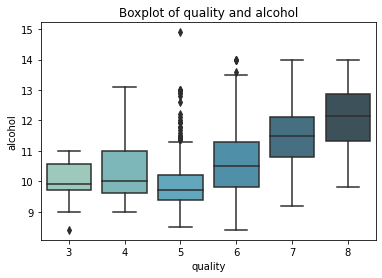

In [20]:
sns.boxplot(y,red_wine_data['alcohol'],palette='GnBu_d')
plt.title("Boxplot of quality and alcohol")
plt.show()

**Observation:**

* The above plot shows the increase in the quality of wine with an increase in alcohol. The quality of the wine is directly related to the amount of alcohol in the wine. More the alcohol in the wine, the better will be the quality.
* Also, the points lying outside the whiskers(the lines extending from the rectangular box) are the outliers.

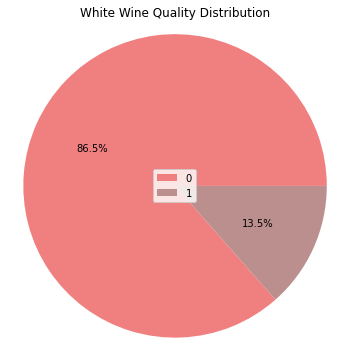

The amount of good quality white wine is  13.5 %.
mean white wine quality =  5.635279347143754


In [21]:
#Grouping the wine based on grade
# Defining 'grade' of wine

#Good wine
red_wine_data['grade'] = 1 

#Bad wine
red_wine_data.grade[red_wine_data.quality < 6.5] = 0 

#sns.set(style="whitegrid")
#p = sns.countplot(data=red_wine_data, x='grade', palette='muted')

#set plotsize and colors

plt.figure(figsize = (6,6))
colors = ['lightcoral', 'rosybrown']

labels = red_wine_data.grade.value_counts().index
plt.pie(red_wine_data.grade.value_counts(), autopct='%1.1f%%',colors=colors)
plt.legend(labels, loc="center")
plt.axis('equal')
plt.title('White Wine Quality Distribution')
plt.show()
#Show mean quality of white wine and quality distribution

print('The amount of good quality white wine is ',round(red_wine_data.grade.value_counts(normalize=True)[1]*100,1),'%.')
print("mean white wine quality = ",red_wine_data["quality"].mean())

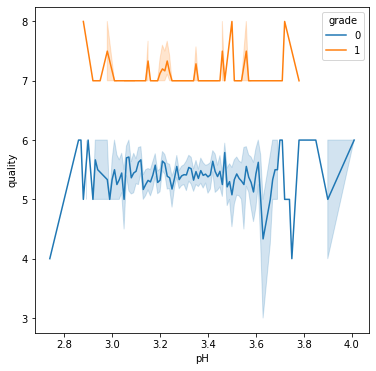

In [22]:
# plot to see how pH is varying in the grade of white wine

plt.figure(figsize=(6,6))
ax = sns.lineplot(x="pH", y="quality", hue="grade", data=red_wine_data,markers=True)

In [23]:
red_wine_data['grade'].value_counts() #prints counts of good and bad white wine

0    1378
1     215
Name: grade, dtype: int64

Now, **Predicting White Wine Quality** using:

1. Random Forest Classifier
2. Gaussian Naive Bayes Classifier
3. Decision Tree Classifier
4. KNeighbors Classifier
5. SVM Classifier

In [24]:
#Checking once more for column names
red_wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'grade'],
      dtype='object')

In [25]:
#Defining X and y
X = red_wine_data.drop(['quality'], axis=1)
y = red_wine_data['quality']

In [26]:
# creating dataset split for prediction
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42) # 80-20 split

# Checking split 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (1274, 12)
y_train: (1274,)
X_test: (319, 12)
y_test: (319,)


In [27]:
# 1. Using Random Forest Classifier

# Load random forest classifier 
from sklearn.ensemble import RandomForestClassifier

# Create a random forest Classifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier/fitting the model
clf.fit(X_train, y_train)

# predict the response
y_pred = clf.predict(X_test)
acc_rf = round(clf.score(X_test,y_test) * 100, 2)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# evaluate accuracy
print("Random Forest Classifier Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Random Forest Classifier Accuracy: 74.92163009404389 %


In [28]:
#2. Gaussian Naive Bayes Classifier

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

# Train the Classifier/fitting the model
gnb.fit(X_train, y_train)

# predict the response
y_pred = gnb.predict(X_test)
acc_gnb = round(gnb.score(X_test,y_test) * 100, 2)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# evaluate accuracy
print("Naive Bayes Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Naive Bayes Accuracy: 71.15987460815047 %


In [29]:
#import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=10)

# Train the Classifier/fitting the model
clf = clf.fit(X_train,y_train)

# predict the response
y_pred = clf.predict(X_test)
acc_dt = round(clf.score(X_test,y_test) * 100, 2)
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score 

# evaluate accuracy
print ("Decision Tree Accuracy:", metrics.accuracy_score(y_test, y_pred)*100,"%")

Decision Tree Accuracy: 68.65203761755487 %


In [30]:
#kNN
import sys, os

# Import kNN classifier
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the Classifier/fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test,y_test) * 100, 2)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# evaluate accuracy
print("kNN Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

kNN Accuracy: 52.03761755485894 %


In [31]:
#Support Vector Machines trial
import sys, os

#Import svm model
from sklearn import svm
from sklearn.svm import SVC

#Create a svm Classifier
clf = SVC(C=1, kernel='rbf')

# Train the Classifier/fitting the model
clf.fit(X_train, y_train)

# predict the response
y_pred = clf.predict(X_test)
acc_svm = round(clf.score(X_test,y_test) * 100, 2)

# evaluate accuracy
print("SVM Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

SVM Accuracy: 49.843260188087775 %


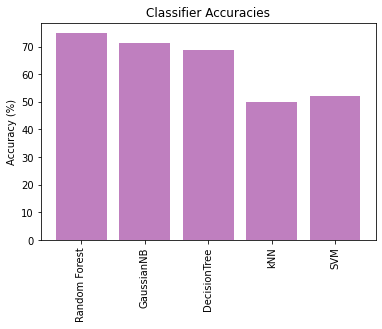

In [32]:
# visualizing accuracies for all ML Algorithms using Matplotlib
predictors_group = ('Random Forest', 'GaussianNB', 'DecisionTree','kNN','SVM')
x_pos = np.arange(len(predictors_group))
accuracies1 = [acc_rf, acc_gnb, acc_dt,acc_svm,acc_knn]
    
plt.bar(x_pos, accuracies1, align='center', alpha=0.5, color='purple')
plt.xticks(x_pos, predictors_group, rotation='vertical')
plt.ylabel('Accuracy (%)')
plt.title('Classifier Accuracies')
plt.show()

In [33]:
#printing top three accuracies

print('Decision Tree:', acc_dt,'%')
print('Random Forest:', acc_rf,'%')
print('GaussianNB:',acc_gnb,'%')

Decision Tree: 68.65 %
Random Forest: 74.92 %
GaussianNB: 71.16 %


Reducing overfitting using Cross Validation for top three Algorithms -> RF, DT and GNB

In [34]:
# importing the model for prediction

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# creating list of tuple wth model and its name  
models = []
models.append(('DT',DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier()))
models.append(('GNB',GaussianNB()))

In [35]:
# Import Cross Validation 
from sklearn.model_selection import cross_val_score

# simulate splitting a dataset of 1000 observations into 5 folds
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=42, shuffle=True)
kf.get_n_splits(X)
# print(kf)

acc = []   # All Algorithm/model accuracies
names = []    # All model name

for name, model in models:
    
    acc_of_model = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy') # kFolds =5 without shuffling
    
    acc.append(acc_of_model) # appending Accuray of different model to acc List
    
    names.append(name)# appending name of models
    Acc =name,round(acc_of_model.mean()*100,2) # printing Output 
    print(Acc)

('DT', 70.64)
('RF', 77.79)
('GNB', 66.56)


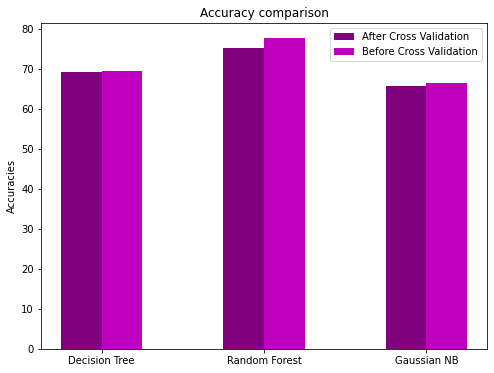

In [36]:
# Plotting all accuracies together for comparison

labels = ['Decision Tree', 'Random Forest','Gaussian NB']

NoCV =[69.49 ,77.65,66.43] # accuracy before Cross Validation
CV=[69.24, 75.14, 65.8] # accuracy after Cross Validation

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

f, ax = plt.subplots(figsize=(8,6)) 
p1 = ax.bar(x - width/2, CV, width, label='After Cross Validation', color='purple')
p2 = ax.bar(x + width/2, NoCV, width, label='Before Cross Validation', color='m')

# Add some text for labels and title 
ax.set_ylabel('Accuracies')
ax.set_title('Accuracy comparison')
ax.set_xticks(x)
plt.xticks()
ax.set_xticklabels(labels)
ax.legend(loc='upper right')
plt.show()

On comparison, the accuracies do not seem to drastically change, but do seem a bit reduced after cross validation which means that K-fold cross validation is giving a better approximation for those accuracies. From the bar plot, Random Forest appears to be providing the better accuracies followed by Decision Tree in predicting the white wine quality. Using this outcome, Random forest and Decision Tree can be applied to the dataset.

In [37]:
filename = 'Wine_EDA.pkl'
pickle.dump(clf,open(filename, 'wb'))

In [38]:
loaded_model = pickle.load(open(filename,'rb'))
loaded_model.predict(X_test)

array([6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6,
       6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6,
       6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5,
       6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6,
       6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6,
       6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5,
       6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 6, 6,
       5, 5, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5,
       5, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6,
       5, 5, 6, 5, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 5, 5, 5,
       6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6,